In [23]:
#importing the required libraries
import sys
import numpy as np
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [24]:
#Importing the MNIST data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [25]:
#Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [26]:
# Building the One Hidden Layer Neural Network model by changing the no of hidden layer neurons 
# Used the cros_val_score cross validation method
# For different values of hidden layer neurons 
# Accuracy of all the 3 folds and their average is calculated

In [27]:
for i in [75, 100, 125]:
    from sklearn.model_selection import cross_val_score
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, i), random_state=1)
    train_acc = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    print("1st Hidden Layer Nodes: " +str(i))
    print("2nd Hidden Layer Nodes: " +str(i))
    print("1st fold accuracy- %.2f%%" %(100*train_acc[0]))  
    print("2nd fold accuracy- %.2f%%" %(100*train_acc[1]))
    print("3rd fold accuracy- %.2f%%" %(100*train_acc[2]))
    print("Average fold accuracy- %.2f%%" %((100*train_acc[2] + 100*train_acc[1] + 100*train_acc[0])/3))

1st Hidden Layer Nodes: 75
2nd Hidden Layer Nodes: 75
1st fold accuracy- 95.36%
2nd fold accuracy- 95.65%
3rd fold accuracy- 95.43%
Average fold accuracy- 95.48%
1st Hidden Layer Nodes: 100
2nd Hidden Layer Nodes: 100
1st fold accuracy- 95.89%
2nd fold accuracy- 95.74%
3rd fold accuracy- 95.69%
Average fold accuracy- 95.77%
1st Hidden Layer Nodes: 125
2nd Hidden Layer Nodes: 125
1st fold accuracy- 96.30%
2nd fold accuracy- 95.93%
3rd fold accuracy- 96.04%
Average fold accuracy- 96.09%


In [28]:
#Choosing  as the no of neurons in the hidden layer
#Performing the accuracy test on the training data

In [29]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(125, 125), random_state=1)
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: %.2f%%" % (accuracy*100))

Training Accuracy: 96.09%


In [30]:
#Printing the confusion matrix for the training set

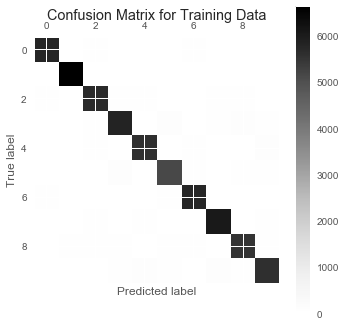

In [31]:
train_conf_mat = confusion_matrix(y_train,y_train_pred)
plt.matshow(train_conf_mat)
plt.title('Confusion Matrix for Training Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
#Priting the error values of the confusion matrix

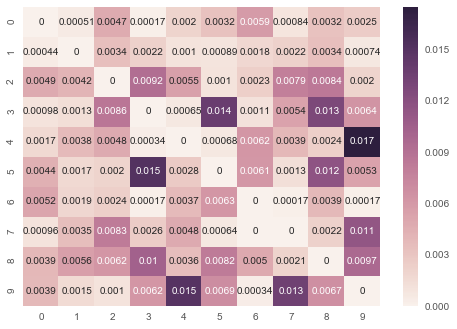

In [33]:
import seaborn as sns
val_row= train_conf_mat.sum(axis=1, keepdims=True)
train_err_conf_mat = train_conf_mat / val_row
np.fill_diagonal(train_err_conf_mat, 0)
ax = sns.heatmap(train_err_conf_mat,annot=True)
plt.show()

In [34]:
#Chose no of neurons in the hidden layer and performing the fit
#Testing the model
#Calculating the accuracy of the test data

In [35]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(125,125), random_state=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Data Accuracy: %.2f%%" % (accuracy*100))

Test Data Accuracy: 96.50%


In [36]:
#Printing the  confusion matrix

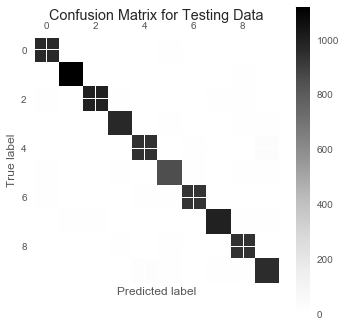

In [37]:
test_conf_mat = confusion_matrix(y_test,y_pred_test)
plt.matshow(test_conf_mat)
plt.title('Confusion Matrix for Testing Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
#Priting the error values of the confusion matrix

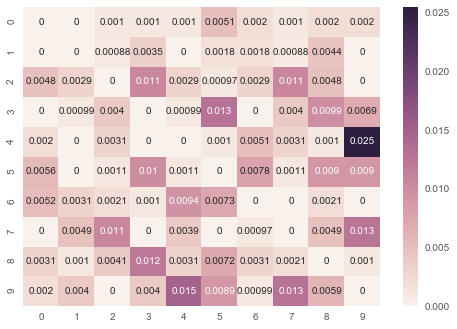

In [39]:
row_sums = test_conf_mat.sum(axis=1, keepdims=True)
norm_conf_mx = test_conf_mat / row_sums
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)
plt.show()